## KNN 
Training/ Fit: Remember data
Given a data points:
1. Calculate its distance to all the other data points 
2. Find K closest data points
3. For regression: return the average of those K points; For classic: return the majority vote;
Both can be weighted 

#### Test point: 
1. Distance metrics 
2. Enhance efficiency by utilizing a heap structure to identify the K closest neighbors

In [1]:
import numpy as np
from collections import Counter
from itertools import cycle
from heapq import heapify, heappop, heappush # min heap in python

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k = 3, type = "regression"):
        # K is defined when calling KNN
        self.k = k
        self.type = type


    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X): 
        # Make prediction for test data X
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict_slow(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
    
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        print(k_indices)
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority voye
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]
    
    
    def _predict(self, x):
        # To make single predictions
        k_nbrs = self._calc_distance(x) # calculate the new data's distance with the training
        # neighbors are top k NN
        k_nbrs_labels = [self.y_train[idx] for _, idx in k_nbrs] # easier to do k
        
        if self.type == "regression":
            prediction = sum(k_nbrs_labels)/self.k
        else:
            prediction = Counter(k_nbrs_labels).most_common()
        return prediction[0][0] # we want to most freq class label

        
    def _calc_distance(self, x):
        neighbors = []
        # use loop to calculate and update heap, we need index to retrieve y
        for idx, x_trn in enumerate(self.X_train): # both x_trn and x is numpy array
            distance = euclidean_distance(x_trn, x)
            
            heappush(neighbors, (-1 * distance, idx)) # min heap to pop the negative distance one
            if len(neighbors) > self.k: # first push to compare then pop to maintain the k sized heap
                heappop(neighbors) # if more than k size, we need to reduce to pop
        return neighbors 

#### Test

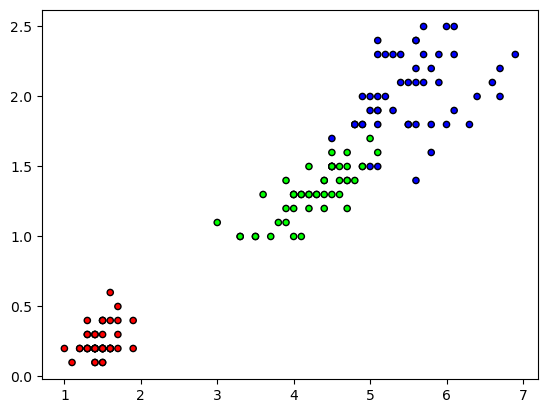

[1, 2, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0]
0.9666666666666667


In [ ]:
if __name__ == "__main__":

    import numpy as np
    from sklearn import datasets
    from sklearn.model_selection import train_test_split
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap
    # from KNN import KNN

    cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])

    iris = datasets.load_iris()
    X, y = iris.data, iris.target
    ml_type = "classification"

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

    plt.figure()
    plt.scatter(X[:,2],X[:,3], c=y, cmap=cmap, edgecolor='k', s=20)
    plt.show()


    clf = KNN(k=5, type = ml_type)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print(predictions)

if ml_type == "classification":
    acc = np.sum(predictions == y_test) / len(y_test) 
    print(acc)
else:
    mse = np.sum((y_test - predictions) ** 2) / len(y_test)
    print(mse)